In [1]:
!pip install pandas textstat



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import textstat
import numpy as np
import sys

# --- 1. Configuration ---
INPUT_FILE = 'compare_different_entity.csv'
OUTPUT_FILE = 'entity_extraction_with_readability.csv'
COLUMN_TO_ANALYZE = 'Answer'

# --- 2. Helper Functions for Safe Calculation ---
# We create 'safe' versions of each function to handle potential errors
# (e.g., text is too short, empty, or has unexpected characters)

def safe_flesch_kincaid_grade(text):
    """Safely calculates Flesch-Kincaid Grade, returning NaN on error."""
    try:
        return textstat.flesch_kincaid_grade(text)
    except:
        return np.nan

def safe_flesch_reading_ease(text):
    """Safely calculates Flesch Reading Ease, returning NaN on error."""
    try:
        return textstat.flesch_reading_ease(text)
    except:
        return np.nan

def safe_gunning_fog(text):
    """Safely calculates Gunning Fog Index, returning NaN on error."""
    try:
        return textstat.gunning_fog(text)
    except:
        return np.nan

def safe_smog_index(text):
    """
    Safely calculates SMOG Index.
    SMOG is known to fail on text with < 3 sentences.
    """
    try:
        return textstat.smog_index(text)
    except ValueError:
        # This specific error happens when text is too short
        return np.nan
    except Exception:
        # Catch any other unexpected error
        return np.nan

def safe_coleman_liau_index(text):
    """Safely calculates Coleman-Liau Index, returning NaN on error."""
    try:
        return textstat.coleman_liau_index(text)
    except:
        return np.nan

# --- 3. Main Processing Script ---
def main():
    """
    Main function to load, process, and save the data.
    """
    # Check if textstat is installed
    try:
        import textstat
    except ImportError:
        print("Error: The 'textstat' library is not installed.")
        print("Please install it by running: pip install textstat")
        sys.exit(1)

    try:
        # Load the dataset
        df = pd.read_csv(INPUT_FILE)
        print(f"Successfully loaded '{INPUT_FILE}'.")

        # Check if the required 'Answer' column exists
        if COLUMN_TO_ANALYZE not in df.columns:
            print(f"Error: Column '{COLUMN_TO_ANALYZE}' not found in the CSV.")
            print(f"Available columns are: {df.columns.tolist()}")
            return

        # Prepare the 'Answer' column:
        # 1. Fill missing (NaN) values with an empty string
        # 2. Ensure the whole column is treated as text (string)
        df[COLUMN_TO_ANALYZE] = df[COLUMN_TO_ANALYZE].fillna('').astype(str)

        print(f"Calculating readability metrics for '{COLUMN_TO_ANALYZE}' column...")

        # Apply each metric using .apply() to run our safe functions on each row
        # A new column is created for each score
        df['readability_fk_grade'] = df[COLUMN_TO_ANALYZE].apply(safe_flesch_kincaid_grade)
        df['readability_fk_ease'] = df[COLUMN_TO_ANALYZE].apply(safe_flesch_reading_ease)
        df['readability_gunning_fog'] = df[COLUMN_TO_ANALYZE].apply(safe_gunning_fog)
        df['readability_smog_index'] = df[COLUMN_TO_ANALYZE].apply(safe_smog_index)
        df['readability_coleman_liau'] = df[COLUMN_TO_ANALYZE].apply(safe_coleman_liau_index)

        print("All readability scores calculated.")

        # Save the updated dataframe to a new CSV file
        df.to_csv(OUTPUT_FILE, index=False)

        print(f"\nSuccessfully saved new file to '{OUTPUT_FILE}'")

        # Display the new columns for the first 5 rows to confirm
        new_columns = [
            COLUMN_TO_ANALYZE,
            'readability_fk_grade',
            'readability_fk_ease',
            'readability_gunning_fog',
            'readability_smog_index',
            'readability_coleman_liau'
        ]
        print("\n--- Sample of Output Data (first 5 rows) ---")
        # Set display options to show more text from the 'Answer' column
        pd.set_option('display.max_colwidth', 100)
        print(df[new_columns].head())

    except FileNotFoundError:
        print(f"Error: The file '{INPUT_FILE}' was not found.")
        print("Please make sure the file is in the same directory as the script.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Run the main function when the script is executed
if __name__ == "__main__":
    main()



Successfully loaded 'compare_different_entity.csv'.
Calculating readability metrics for 'Answer' column...
All readability scores calculated.

Successfully saved new file to 'entity_extraction_with_readability.csv'

--- Sample of Output Data (first 5 rows) ---
                                                                                                Answer  \
0  Dear Client,If your employer is pressuring you to resign due to a medical condition requiring a ...   
1  Dear Client,Regardless of the sector or character of establishments, either public or private, t...   
2  Dear Sir,Dear SirPlease approach the following authority or similar authority in a stateThe Offi...   
3  Dear Client,Your immediate steps should involve thoroughly examining your sabbatical leave polic...   
4  Dear Client,In the query, you express your current situation post-sabbatical leave, but did not ...   

   readability_fk_grade  readability_fk_ease  readability_gunning_fog  \
0             19.171190      

In [7]:
# First, you need to install the library:
# pip install textstat

import textstat

# Your different answers
answer_1 = '''Dear Client,If your employer is pressuring you to resign due to a medical condition requiring a shift change, despite you being medically fit for other duties, do not resign. Immediately document all communications, especially HR's denial of your shift change and their demand for your resignation, as this constitutes "constructive dismissal" under law.Formally communicate to HR, in writing, that you are not resigning, reiterate your medical fitness for day shift, and state that any forced resignation will be considered unlawful termination. Then, seek legal counsel from an employment lawyer to understand your rights under the Industrial Disputes Act or Shops and Establishments Act, and explore options like filing a complaint with the Labour Commissioner or pursuing legal action for unlawful termination, potentially seeking reinstatement or compensation.'''
answer_2 = "This second, alternative answer provides a substantially more verbose and polysyllabic explanation, utilizing complex sentence structures to elucidate the topic more thoroughly."

# --- Calculate Scores for Answer 1 ---
print("--- Answer 1 Scores ---")
print(f"Flesch-Kincaid Grade: {textstat.flesch_kincaid_grade(answer_1)}")
print(f"Flesch Reading Ease: {textstat.flesch_reading_ease(answer_1)}")
print(f"Gunning Fog: {textstat.gunning_fog(answer_1)}")

# --- Calculate Scores for Answer 2 ---
print("\n--- Answer 2 Scores ---")
print(f"Flesch-Kincaid Grade: {textstat.flesch_kincaid_grade(answer_2)}")
print(f"Flesch Reading Ease: {textstat.flesch_reading_ease(answer_2)}")
print(f"Gunning Fog: {textstat.gunning_fog(answer_2)}")

--- Answer 1 Scores ---
Flesch-Kincaid Grade: 19.17119047619048
Flesch Reading Ease: 13.719642857142901
Gunning Fog: 23.711111111111112

--- Answer 2 Scores ---
Flesch-Kincaid Grade: 20.344545454545457
Flesch Reading Ease: -11.613181818181829
Gunning Fog: 21.527272727272727


In [8]:
!pip install pandas seaborn matplotlib



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Successfully loaded 'compare_extraction.csv'.

Calculating Pearson's Correlation Matrix...

--- Pearson Correlation Matrix ---
              fk_grade   fk_ease  gunning_fog  smog_index  coleman_liau
fk_grade      1.000000 -0.911480     0.974510    0.948880      0.638281
fk_ease      -0.911480  1.000000    -0.936222   -0.962513     -0.867074
gunning_fog   0.974510 -0.936222     1.000000    0.980017      0.665709
smog_index    0.948880 -0.962513     0.980017    1.000000      0.732404
coleman_liau  0.638281 -0.867074     0.665709    0.732404      1.000000
----------------------------------

Generating and saving heatmap to 'readability_correlation_heatmap.png'...
Successfully saved heatmap to 'readability_correlation_heatmap.png'.


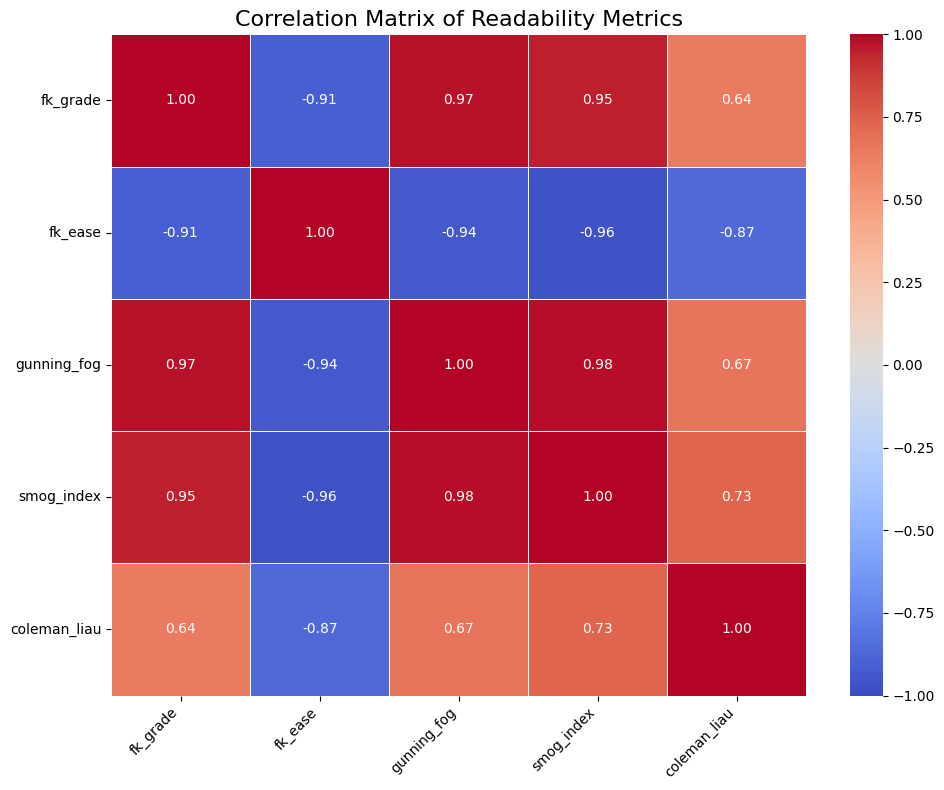

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# --- Configuration ---
INPUT_FILE = 'compare_extraction.csv'
OUTPUT_IMAGE = 'readability_correlation_heatmap.png'

# This dictionary maps the exact, messy column names from your CSV
# to short, clean names for easy analysis.
COLUMN_MAPPING = {
    'Flesch-Kincaid Grade Level \n(Lower is easier)': 'fk_grade',
    'Flesch Reading Ease\n(Higher is easier)': 'fk_ease',
    'Gunning Fog Index\n(Lower is easier)': 'gunning_fog',
    'SMOG Index\n(Lower is easier)': 'smog_index',
    'Coleman-Liau Index\n(Lower is easier)': 'coleman_liau'
}

def analyze_correlations():
    """
    Loads the CSV, calculates the correlation matrix for readability
    scores, and saves a heatmap.
    """
    # --- 1. Check for Libraries ---
    try:
        import pandas
        import seaborn
        import matplotlib
    except ImportError as e:
        print(f"Error: Missing required library. {e}")
        print("Please install the necessary libraries by running:")
        print("pip install pandas seaborn matplotlib")
        sys.exit(1)

    # --- 2. Load Data ---
    try:
        df = pd.read_csv(INPUT_FILE)
        print(f"Successfully loaded '{INPUT_FILE}'.")
    except FileNotFoundError:
        print(f"Error: The file '{INPUT_FILE}' was not found.")
        print("Please make sure the file is in the same directory as the script.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        sys.exit(1)

    # --- 3. Rename and Select Columns ---
    # Rename columns based on our mapping
    df = df.rename(columns=COLUMN_MAPPING)

    # Get the list of our new, clean column names
    readability_columns = list(COLUMN_MAPPING.values())

    # Check if all expected columns were successfully renamed and exist
    existing_cols = [col for col in readability_columns if col in df.columns]

    if len(existing_cols) < len(readability_columns):
        print("Warning: Could not find all expected readability columns.")
        print(f"Found: {existing_cols}")
        if not existing_cols:
            print("Error: No readability columns found. Exiting.")
            sys.exit(1)

    # Create a new DataFrame with only the readability columns
    readability_df = df[existing_cols]

    # --- 4. Calculate Correlation Matrix ---
    print("\nCalculating Pearson's Correlation Matrix...")
    # .corr() computes the pairwise correlation of columns
    correlation_matrix = readability_df.corr(method='pearson')

    print("\n--- Pearson Correlation Matrix ---")
    # Set display options to show all columns and rows neatly
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_columns', None)
    print(correlation_matrix)
    print("----------------------------------")

    # --- 5. Generate and Save Heatmap ---
    print(f"\nGenerating and saving heatmap to '{OUTPUT_IMAGE}'...")

    plt.figure(figsize=(10, 8))
    # annot=True shows the numbers in each cell
    # cmap='coolwarm' gives the classic red-blue color scheme
    # fmt='.2f' formats the numbers to 2 decimal places
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        linewidths=.5,
        vmin=-1,  # Set color bar min to -1
        vmax=1   # Set color bar max to 1
    )
    plt.title('Correlation Matrix of Readability Metrics', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()  # Adjusts plot for better visibility

    try:
        plt.savefig(OUTPUT_IMAGE)
        print(f"Successfully saved heatmap to '{OUTPUT_IMAGE}'.")
    except Exception as e:
        print(f"Error saving heatmap: {e}")

if __name__ == "__main__":
    analyze_correlations()


In [15]:
import pandas as pd
import re
import sys
import numpy as np

# --- Configuration ---
INPUT_FILE = 'compare_extraction.csv'
OUTPUT_FILE = 'compare_extraction_with_counts.csv'
COLUMN_TO_ANALYZE = '(Entity + Fact) Extraction by LLM'
NEW_COLUMN_NAME = 'llm_entity_count'

def count_entities_in_braces(text_content):
    """
    Counts the number of comma-separated items inside the first
    pair of curly braces {} found in the text.
    """
    # Ensure the input is a string, otherwise return 0
    if not isinstance(text_content, str):
        return 0

    # Regular expression to find content *inside* the first pair of braces.
    # \{     - Matches the opening {
    # ([^}]+) - Captures one or more characters that are NOT a }
    # \}     - Matches the closing }
    # This pattern intentionally does *not* match empty braces "{}"

    match = re.search(r'\{([^}]+)\}', text_content)

    if match:
        # We found a match, and group(1) is the content *inside* the braces
        content = match.group(1)

        # Split the content by comma and count the resulting items
        # .strip() on content removes potential whitespace if it's just ' '
        if not content.strip():
            # Content was just whitespace, so count is 0
            return 0

        entities = content.split(',')
        return len(entities)
    else:
        # No match found (e.g., braces were empty "{}" or not present)
        return 0

def main():
    """
    Main function to load, process, and save the data.
    """
    # --- 1. Load Data ---
    try:
        df = pd.read_csv(INPUT_FILE)
        print(f"Successfully loaded '{INPUT_FILE}'.")
    except FileNotFoundError:
        print(f"Error: The file '{INPUT_FILE}' was not found.")
        print("Please make sure the file is in the same directory as the script.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        sys.exit(1)

    # --- 2. Check Column ---
    if COLUMN_TO_ANALYZE not in df.columns:
        print(f"Error: Column '{COLUMN_TO_ANALYZE}' not found in the CSV.")
        print(f"Available columns are: {df.columns.tolist()}")
        sys.exit(1)

    print(f"Analyzing column: '{COLUMN_TO_ANALYZE}'")

    # --- 3. Apply Counting Function ---
    # Fill NaN/empty values with an empty string to prevent errors
    df[COLUMN_TO_ANALYZE] = df[COLUMN_TO_ANALYZE].fillna('')

    # Apply our custom counting function to each row
    df[NEW_COLUMN_NAME] = df[COLUMN_TO_ANALYZE].apply(count_entities_in_braces)

    print("Successfully counted entities.")

    # --- 4. Save and Display Results ---
    try:
        df.to_csv(OUTPUT_FILE, index=False)
        print(f"Successfully saved results to '{OUTPUT_FILE}'.")
    except Exception as e:
        print(f"Error saving file: {e}")

    # Print the first 10 rows of the original and new columns for review
    print(f"\n--- Sample of Results (first 10 rows) ---")
    pd.set_option('display.max_colwidth', 50) # Truncate long text for display
    print(df[[COLUMN_TO_ANALYZE, NEW_COLUMN_NAME]].head(10))

if __name__ == "__main__":
    main()


Successfully loaded 'compare_extraction.csv'.
Analyzing column: '(Entity + Fact) Extraction by LLM'
Successfully counted entities.
Successfully saved results to 'compare_extraction_with_counts.csv'.

--- Sample of Results (first 10 rows) ---
                   (Entity + Fact) Extraction by LLM  llm_entity_count
0  {'constructive dismissal', 'industrial dispute...                 6
1  {'hr policy', 'high court', 'labour court', 'm...                 6
2  {'conciliation proceedings', 'industrial dispu...                16
3  {'gratuity', 'constructive dismissal', 'return...                 9
4  {'grievance escalation', 'legal notice', 'loss...                17
5  {'abnormal loss', 'recovery of amount', 'claim...                 5
6  {'lawful profession', 'agreements in writing',...                19
7  {'legal notice', 'bond agreement', 'civil suit...                10
8  {'ews category reservations', 'residential plo...                 9
9  {'total family income', 'sc/st/obc categories